<center> <h3> Machine Learning with Scikit-Learn: A Tutorial </h3> </center>
<center> <h4> Md. Shoaibur Rahman </h4> </center> 
<center> <h4> Department of Neuroscience, Baylor College of Medicine, Houston, TX </h4> </center> 



### Introduction

In this tutorial, we will learn how to use scikit-learn (named as sklearn package in python) to train and test machine learning models for classification, regression and clustering.

For simplicity, we will use the available data in the sklearn package. The famous "iris" dataset will be used to discuss classification problems; "boston" housing price dataset will be used to discuss regression problems; and some toy datasets (circles, moons, and blobs) will be used to discuss clustering problems.

Here, the tutorial is divided into 3 sections. Section 1 presents a comparison among the commonly used classification models. Section 2 presents a comparison among the commonly used regression models. Finally, section 3 presents a comparison among the commonly used clustering methods.



### 1. Classification

Classification refers to predicting a category from labeled data. In this section, we will evaluate the performances of several classification algorithms, including:

* Logistic Regression Classifier
* Decision Tree Classifier
* K-Nearest Neighbors Classifier
* Linear Discriminant Analysis Classifier
* Gaussian Naive Bayes Classifier
* Support Vector Machines Classifier (with RBF kernel)
* Support Vector Machines Classifier (with Linear kernel)
* Stochastic Gradient Descent Classifier
* Random Forest Classifier

First thing first, load the packages!

In [1]:
import sklearn
import numpy as np
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
import itertools
from itertools import cycle, islice

from sklearn import model_selection, datasets
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.kernel_approximation import RBFSampler

seed = 1

#print( dir(model_selection) )

import warnings
warnings.filterwarnings('ignore')

### Exploratory data analysis

We will use iris dataset. Here, we load the dataset first, and then know how the data are stored through statistical summaries and graphical visualizations.

In [2]:
# Load dataset
url = "datasets/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

In [3]:
# Shape of the dataset
print(dataset.shape)

(150, 5)


This means that the dataset has 150 instances and 5 attributes. Now, in the table below, we see first 10 instances and the names of the attributes (e.g. sepal-length, sepal-width, petal-length, petal-width and class).

In [4]:
print(dataset.head(10))

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


There are 3 distinct classes (e.g. setosa, vesicolor and virginica). We will use the sepal and petal information to predict the class of a given instance.

In [5]:
# Class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


Now we can take a look at a summary of each attribute. This includes the count, mean, the min and max values as well as some percentiles.

In [6]:
# Descriptions
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


Now, let's visualize the distribution of the data through univariate boxp lots and multivariate scatter plots.

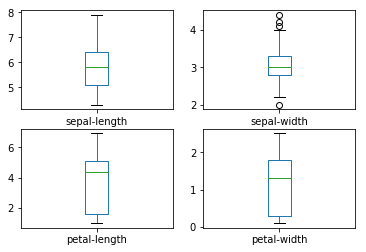

In [7]:
# Box plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

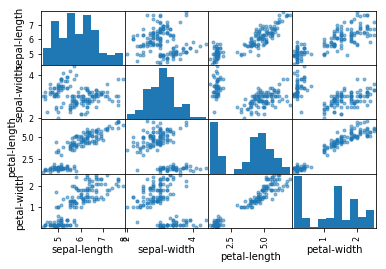

In [8]:
# Scatter plots
scatter_matrix(dataset)
plt.show()

The box plots give us a much clearer idea of the distribution of the input attributes. The scatter plots display some structured relationships between input variables. Note the diagonal grouping of some pairs of attributes. This suggests a high correlation and a predictable relationship.

In [9]:
# data = datasets.load_iris()
# X = dataset.data
# Y = dataset.target
# class_names = dataset.target_names

In [10]:
# for i in range(18):
#     plt.subplot(3,6,i+1)
#     plt.imshow(X[i,:].reshape(8,8))
#     plt.axis("off")
#     plt.title(str(Y[i]))
# plt.show()

### Building the models

First, identify the predictors and the target. In this dataset, the first 4 attributes are the predictors and the 5th attribute is the target. Split the predictors and targets into training and validatation sets. Sometimes, we may want to use sample methods, in which case, we will also need to extract some additinoal features from the data.

In [11]:
X = dataset.values[:,0:4] # Predictors
Y = dataset.values[:,4] # Target classes

# Training and validation set
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size = 0.2, random_state = seed)

# Feature extraction for sampler methods
rbf_features = RBFSampler(gamma = 0.1, random_state = seed)
X_train_features = rbf_features.fit_transform(X_train)
X_validation_features = rbf_features.fit_transform(X_validation)

List some classification models that we would to evaluate. As mentioned above, we will evaluate linear models (logistic regression and SGD classifiers), decision tree, nearest neighbors, linear discriminate analysis, naive Bayes, svm, and ensemble (random forest) based classifiers.

In [12]:
models = [("Linear Regression", LogisticRegression()),
          ("Decision Tree", DecisionTreeClassifier()),
          ("Nearest Neighbors", KNeighborsClassifier()),
          ("Linear Discriminant Analysis", LinearDiscriminantAnalysis()),
          ("Naive Bayes", GaussianNB()),
          ("SVM", SVC(kernel = "rbf")),
          ("Linear SVM", LinearSVC()),
          ("Stochastic Gradient", SGDClassifier()),
          ("Random Forest", RandomForestClassifier(random_state=seed))]

We will train each model using the training data. Each model will give a training accuracy. The model with highest accuracy is preferred.

In [13]:
results = []
kernel_approximation = False

for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = seed)
    if kernel_approximation:
        cv_results = model_selection.cross_val_score(model, X_features, Y_train, cv = kfold, scoring = "accuracy")
    else:
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv = kfold, scoring = "accuracy")
    results.append(cv_results.mean())
    
    print("Training accuracy: " + str(cv_results.mean()) + " with " + str(name) )

Training accuracy: 0.933333333333 with Linear Regression
Training accuracy: 0.941666666667 with Decision Tree
Training accuracy: 0.958333333333 with Nearest Neighbors
Training accuracy: 0.975 with Linear Discriminant Analysis
Training accuracy: 0.941666666667 with Naive Bayes
Training accuracy: 0.983333333333 with SVM
Training accuracy: 0.941666666667 with Linear SVM
Training accuracy: 0.7 with Stochastic Gradient
Training accuracy: 0.941666666667 with Random Forest


Once all the models are trained, we can identify the best model based on their training accuracy, i.e. the model with highest training accuracy. For this particular dataset, SVC (support vector machines classifiers with radial basis function kernel) provides the highest accuracy.

In [14]:
best_model_name, best_model = models[np.argmax(results)]
print("Best model: " + str(best_model))

Best model: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


Now, we will see the best model performs on the test data. We will compute test accuracy and generate report to display other informative information including precesion and recall. One other useful way to visualize the performance is using the confusion matrix. To display a confusion matrix with better graphics, let's define a function:

In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Now, fit the best model with the training set, predict target class labels, and compute the accuracy. Also, generate the classification reports and confusion matrix, and visualize them.

Test accuracy: 0.966666666667

Test classification reports:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

    avg / total       0.97      0.97      0.97        30



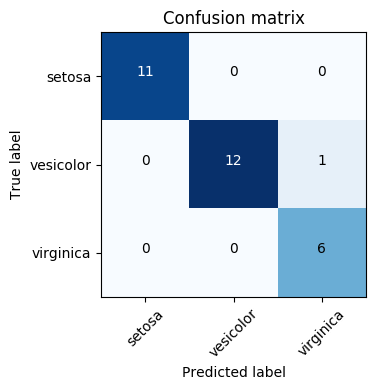

In [16]:
best_model.fit(X_train, Y_train)
predictions = best_model.predict(X_validation)
accuracy = accuracy_score(Y_validation, predictions)
reports = classification_report(Y_validation, predictions)
cnf_matrix = confusion_matrix(Y_validation, predictions)

print("Test accuracy: " + str(accuracy))
print("\nTest classification reports:\n", reports)
# Plot non-normalized confusion matrix
class_names = ["setosa","vesicolor","virginica"]
np.set_printoptions(precision=2)
plt.figure(figsize=(4,4), dpi = 100)
plot_confusion_matrix(cnf_matrix, classes = class_names, title='Confusion matrix')
plt.show()



### 2. Regression

Regression refers to predicting a quantity from some predictors. In this section, we will evaluate the performances of several regression algorithms, including:

* Linear Regression
* Ridge Regression
* Lasso Regression
* Elastic-Net Regression
* SGD Regressor
* Support Vector Machines Regression (with RBF kernel)
* Support Vector Machines Regression (with Linear kernel)
* Random Forest Regression

Again, load the packages!

In [17]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

### Data

We will use boston housing price data set. The dataset has 506 instances and 13 predictors or features. The feature names are and their description are given in DESCR field of the data.

In [18]:
# Load data
data = datasets.load_boston()
X = data.data
Y = data.target
# Data shapes
print("Dataset shape: " + str(X.shape))
print("Target shape: " + str(Y.shape))

# Spliting
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size = 0.2, random_state = seed)
# Training and 
print("Training set shape: " + str(X_train.shape))
print("Training target shape: " + str(Y_train.shape))
print("Test set shape: " + str(X_validation.shape))
print("Test target shape: " + str(Y_validation.shape))

# Feature description
print(data.DESCR)

Dataset shape: (506, 13)
Target shape: (506,)
Training set shape: (404, 13)
Training target shape: (404,)
Test set shape: (102, 13)
Test target shape: (102,)
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD   

### Building the models

List some classification models that we would to evaluate. As mentioned above, we will evaluate linear models (linear regression, ridge, lasso, elastic-net and SGD regression), svm, and ensemble (random forest) based regression.

We will train each model using the training data. Each model will give a mean-squared-error loss. The model with the lowest loss is preferred.

In [19]:
models = [("Linear Regression", LinearRegression()),
          ("Ridge", Ridge(alpha = 0.1)),
          ("Lasso", Lasso(alpha = 0.1)),
          ("Elastic-Net", ElasticNet(alpha = 0.5)),
          ("SVR", SVR(kernel = "rbf")),
          ("Linear SVR", LinearSVR()),
          ("Randome Forest", RandomForestRegressor(random_state = seed)),
          ("sGD", SGDRegressor(random_state = seed))]

loss = []

for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = seed)
    cv_results = model_selection.cross_val_predict(model, X_train, Y_train, cv = kfold,)
    loss.append(mean_squared_error(Y_train, cv_results))
    print("mse: " + str(mean_squared_error(Y_train, cv_results)))

mse: 24.1980484077
mse: 24.1876704893
mse: 25.3893915757
mse: 26.1590918472
mse: 81.5344023736
mse: 62.6174355069
mse: 11.4969356436
mse: 9.13352686064e+28


Once all the models are trained, we can identify the best model based on their training loss, i.e. the model with the lowest loss. For this particular dataset, Random Forest Regression provides the lowest loss.

In [20]:
best_model_name, best_model = models[np.argmin(loss)]
print("Best model: " + str(best_model))

Best model: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)


Now, fit the best model with the training set, predict the target quantity, and compute the loss. Also, visualize the predicted and actual values.

Test loss: 11.1686931373


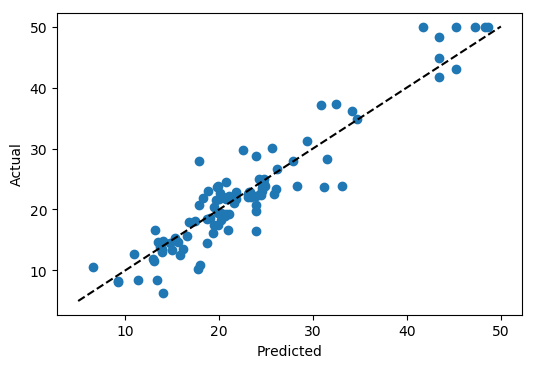

In [21]:
best_model.fit(X_train, Y_train)
predictions = best_model.predict(X_validation)

test_loss = mean_squared_error(predictions, Y_validation)
print("Test loss: " + str(test_loss))

plt.figure(dpi = 100)
plt.scatter(predictions, Y_validation)
plt.plot([5,50],[5,50],"--k")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The figure above shows a scatter plot of the actual and predicted target values. Each dot represents an instance. The dashed line represnts the identity line. For an ideal model, all the dots will lie on the identity line, i.e. actual = predicted. In this figure, the dots are distributed along the identity line, so the random forest regression model does a pretty good job in this case.

### 3. Clustering

Clustering refers to grouping a set of unlabeled objects/data. In this section, we will evaluate the performances of several clustering algorithms, including:

* K-Means
* Mini-Batch K-Means
* Mean Shift
* Affinity propagation
* Spectral
* Aggolomerative (ward and average linkage)
* DBSCAN
* Gaussian Mixture Model

Once again, load the packages!

In [22]:
from sklearn import cluster, mixture, datasets

### Data

We will use available toy data sets in python. Specifically, three datasets will be used: noisy circles, noisy moons and blobs. Each dataset will have 2500 samples.

In [23]:
n_samples = 2500
seed = 1
cluster_datasets = [("Noisy_Circles", datasets.make_circles(n_samples = n_samples, factor = 0.5, noise = 0.05)),
           ("Noisy_Moons", datasets.make_moons(n_samples = n_samples, noise = 0.05)),
           ("Blobs", datasets.make_blobs(n_samples = n_samples, cluster_std=[1.0, 1.5, 2.0], random_state = seed))]

### Building the models

List some clustering models that we would to evaluate. As mentioned above, we will evaluate k-means, mini-batch k-means, mean shift, affinity propagation, spectral, hierarchical clustering (ward and average linkage) DBSCAN and Gaussian mixture model clustering.

Each model has different types of parameters, e.g. number of clusters for k-means, minibatch k-means etc., damping for affinity propagation and so on. We need to set or tune those parameters for the optimum performance. 

In [24]:
n_clusters = 3
damping = 0.9
eps = 0.2
preference = -200
models = [("KMeans", cluster.KMeans(n_clusters = n_clusters)),
         ("MiniBatchKMeans", cluster.MiniBatchKMeans(n_clusters = n_clusters)),
         ("MeanShift", cluster.MeanShift()),
         ("AffinityPropagation", cluster.AffinityPropagation(damping = damping, preference = preference)),
         ("Spectral", cluster.SpectralClustering(n_clusters = n_clusters)),
         ("Ward", cluster.AgglomerativeClustering(n_clusters = n_clusters, linkage = "ward")),
         ("AverageLinkage", cluster.AgglomerativeClustering(n_clusters = n_clusters, linkage = "average")),
         ("DBSCAN", cluster.DBSCAN(eps = eps)),
         ("GaussinMixture", mixture.GaussianMixture(n_components = n_clusters, covariance_type = "full"))]

Here, we fit each model for each dataset and visualize the resulting clusters.

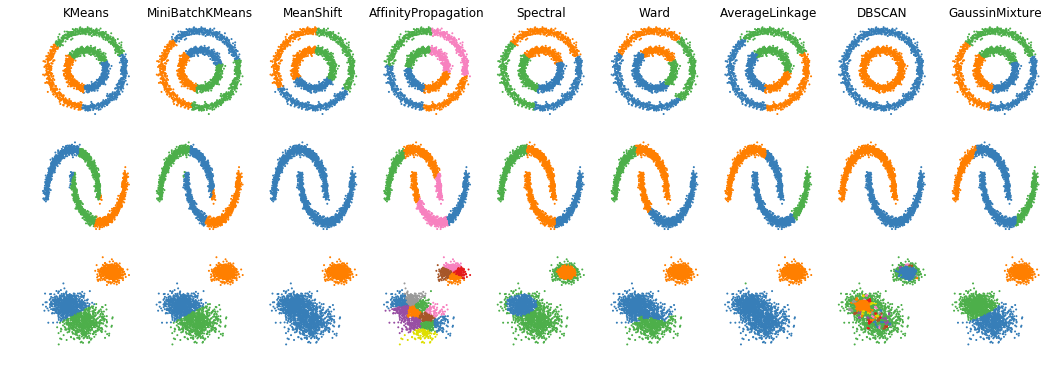

In [25]:
n_plot = 0
plt.figure(figsize = (18,6))
for dataset_name, dataset in cluster_datasets:
    X, Y = dataset
    for model_name, model in models:
        model.fit(X)
        if hasattr(model, "labels_"):
            Y_pred = model.labels_.astype(np.int)
        else:
            Y_pred = model.predict(X)
        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(Y_pred) + 1))))
        n_plot += 1
        plt.subplot(len(cluster_datasets), len(models), n_plot)
        plt.scatter(X[:,0], X[:,1], s = 1, color = colors[Y_pred])
        if dataset_name == cluster_datasets[0][0]:
            plt.title(model_name)
        plt.axis("off")
plt.show()